In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# train test split
from sklearn.model_selection import train_test_split
# regression model
from sklearn.linear_model import LinearRegression
# regression analysis
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm


# Data Cleaning

In [6]:
wage_data = pd.read_csv('usa_00006.csv.gz', compression="gzip")
wage_data

,REGION,SEX,AGE,MARST,RACE,RACED,HCOVANY,EDUC,EDUCD,DEGFIELD,DEGFIELDD,EMPSTAT,EMPSTATD,INCWAGE,INCWELFR,INCINVST,PWSTATE2,TRANTIME
0,32,2,85,5,8,801,2,7,71,0,0,3,30,0,0,0,0,0
1,32,1,51,5,1,100,2,6,64,0,0,3,30,12500,0,0,0,0
2,32,2,36,6,2,200,2,2,26,0,0,3,30,16400,0,0,0,0
3,32,1,74,6,2,200,2,0,2,0,0,3,30,0,0,0,0,0
4,32,1,49,4,1,100,1,7,71,0,0,3,30,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3373373,41,1,33,6,1,100,2,10,101,11,1199,1,10,52000,0,0,56,10
3373374,41,2,27,6,1,100,2,10,101,23,2305,1,10,43000,0,0,56,45
3373375,41,1,1,6,1,100,2,0,1,0,0,0,0,999999,99999,999999,0,0
3373376,41,1,66,1,1,100,2,6,63,0,0,1,10,162000,0,0,56,10


In [8]:
wage_data = wage_data.drop(columns=['RACED', 'EDUCD','DEGFIELDD', 'EMPSTATD', 'PWSTATE2'])
wage_data

,REGION,SEX,AGE,MARST,RACE,HCOVANY,EDUC,DEGFIELD,EMPSTAT,INCWAGE,INCWELFR,INCINVST,TRANTIME
0,32,2,85,5,8,2,7,0,3,0,0,0,0
1,32,1,51,5,1,2,6,0,3,12500,0,0,0
2,32,2,36,6,2,2,2,0,3,16400,0,0,0
3,32,1,74,6,2,2,0,0,3,0,0,0,0
4,32,1,49,4,1,1,7,0,3,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3373373,41,1,33,6,1,2,10,11,1,52000,0,0,10
3373374,41,2,27,6,1,2,10,23,1,43000,0,0,45
3373375,41,1,1,6,1,2,0,0,0,999999,99999,999999,0
3373376,41,1,66,1,1,2,6,0,1,162000,0,0,10


#### Data Code

##### Race Codes: 

1	White	
2	Black/African American	
3	American Indian or Alaska Native	
4	Chinese	
5	Japanese	
6	Other Asian or Pacific Islander	
7	Other race, nec	
8	Two major races	
9	Three or more major races

##### HCOVANY Codes: 

1	No health insurance coverage	
2	With health insurance coverage

##### EDUC codes:

00	N/A or no schooling	X
01	Nursery school to grade 4	X
02	Grade 5, 6, 7, or 8	X
03	Grade 9	X
04	Grade 10	X
05	Grade 11	X
06	Grade 12	X
07	1 year of college	X
08	2 years of college	X
09	3 years of college	·
10	4 years of college	X
11	5+ years of college	X
99	Missing


##### DEGFIELD Codes: 

00	N/A	X
11	Agriculture	X
13	Environment and Natural Resources	X
14	Architecture	X
15	Area, Ethnic, and Civilization Studies	X
19	Communications	X
20	Communication Technologies	X
21	Computer and Information Sciences	X
22	Cosmetology Services and Culinary Arts	X
23	Education Administration and Teaching	X
24	Engineering	X
25	Engineering Technologies	X
26	Linguistics and Foreign Languages	X
29	Family and Consumer Sciences	X
32	Law	X
33	English Language, Literature, and Composition	X
34	Liberal Arts and Humanities	X
35	Library Science	X
36	Biology and Life Sciences	X
37	Mathematics and Statistics	X
38	Military Technologies	X
40	Interdisciplinary and Multi-Disciplinary Studies (General)	X
41	Physical Fitness, Parks, Recreation, and Leisure	X
48	Philosophy and Religious Studies	X
49	Theology and Religious Vocations	X
50	Physical Sciences	X
51	Nuclear, Industrial Radiology, and Biological Technologies	X
52	Psychology	X
53	Criminal Justice and Fire Protection	X
54	Public Affairs, Policy, and Social Work	X
55	Social Sciences	X
56	Construction Services	X
57	Electrical and Mechanic Repairs and Technologies	X
58	Precision Production and Industrial Arts	·
59	Transportation Sciences and Technologies	X
60	Fine Arts	X
61	Medical and Health Sciences and Services	X
62	Business	X
64	History


##### PWSTATE2:

00	N/A	X
01	Alabama	X
02	Alaska	X
04	Arizona	X
05	Arkansas	X
06	California	X
08	Colorado	X
09	Connecticut	X
10	Delaware	X
11	District of Columbia	X
12	Florida	X
13	Georgia	X
15	Hawaii	X
16	Idaho	X
17	Illinois	X
18	Indiana	X
19	Iowa	X
20	Kansas	X
21	Kentucky	X
22	Louisiana	X
23	Maine	X
24	Maryland	X
25	Massachusetts	X
26	Michigan	X
27	Minnesota	X
28	Mississippi	X
29	Missouri	X
30	Montana	X
31	Nebraska	X
32	Nevada	X
33	New Hampshire	X
34	New Jersey	X
35	New Mexico	X
36	New York	X
37	North Carolina	X
38	North Dakota	X
39	Ohio	X
40	Oklahoma	X
41	Oregon	X
42	Pennsylvania	X
44	Rhode Island	X
45	South Carolina	X
46	South Dakota	X
47	Tennessee	X
48	Texas	X
49	Utah	X
50	Vermont	X
51	Virginia	X
53	Washington	X
54	West Virginia	X
55	Wisconsin	X
56	Wyoming	X

##### State group codes (UR samples)	
61	Maine-New Hampshire-Vermont	·
62	Massachusetts-Rhode Island	·
63	Minnesota-Iowa-Missouri-Kansas-Nebraska-S.Dakota-N.Dakota	·
64	Maryland-Delaware	·
65	Montana-Idaho-Wyoming	·
66	Utah-Nevada	·
67	Arizona-New Mexico	·
68	Alaska-Hawaii	·
72	Puerto Rico	X
73	U.S. outlying area	·
74	United States (1980 Puerto Rico samples)	·
80	Abroad	·
81	Europe	X
82	Eastern Asia	·
83	Other Asia, n.s. (2003-2005 ACS); South Central, South East, and Western Asia (2000-2002 ACS)	X
84	Mexico	X
85	Other Americas	X
86	Other, n.e.c.	X
87	Iraq	·
88	Canada	·
90	Confidential	·
99	Not reported

In [10]:
# Remove rows where INCWAGE is 999999 (N/A)
# revome rows where income is na
wage_data.dropna(subset=['INCWAGE'], inplace=True)
wage_data = wage_data[wage_data['INCWAGE'] != 999999]
wage_data

,REGION,SEX,AGE,MARST,RACE,HCOVANY,EDUC,DEGFIELD,EMPSTAT,INCWAGE,INCWELFR,INCINVST,TRANTIME
0,32,2,85,5,8,2,7,0,3,0,0,0,0
1,32,1,51,5,1,2,6,0,3,12500,0,0,0
2,32,2,36,6,2,2,2,0,3,16400,0,0,0
3,32,1,74,6,2,2,0,0,3,0,0,0,0
4,32,1,49,4,1,1,7,0,3,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3373372,41,1,55,6,1,2,6,0,1,21800,0,0,13
3373373,41,1,33,6,1,2,10,11,1,52000,0,0,10
3373374,41,2,27,6,1,2,10,23,1,43000,0,0,45
3373376,41,1,66,1,1,2,6,0,1,162000,0,0,10


In [12]:
wage_data.describe()

,REGION,SEX,AGE,MARST,RACE,HCOVANY,EDUC,DEGFIELD,EMPSTAT,INCWAGE,INCWELFR,INCINVST,TRANTIME
count,2.809390e+06,2.809390e+06,2.809390e+06,2.809390e+06,2.809390e+06,2.809390e+06,2.809390e+06,2.809390e+06,2.809390e+06,2.809390e+06,2.809390e+06,2.809390e+06,2.809390e+06
mean,2.839617e+01,1.513144e+00,4.975876e+01,3.123662e+00,2.414484e+00,1.921980e+00,7.418151e+00,1.414194e+01,1.855315e+00,3.521161e+04,4.859950e+01,3.015792e+03,1.224302e+01
std,1.027669e+01,4.998273e-01,1.974501e+01,2.240868e+00,2.509463e+00,2.682033e-01,2.467408e+00,2.257371e+01,9.777120e-01,6.538914e+04,6.935578e+02,2.496205e+04,2.030420e+01
min,1.100000e+01,1.000000e+00,1.600000e+01,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,-3.000000e+03,0.000000e+00
25%,2.100000e+01,1.000000e+00,3.300000e+01,1.000000e+00,1.000000e+00,2.000000e+00,6.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,3.100000e+01,2.000000e+00,5.000000e+01,2.000000e+00,1.000000e+00,2.000000e+00,7.000000e+00,0.000000e+00,1.000000e+00,9.000000e+03,0.000000e+00,0.000000e+00,0.000000e+00
75%,3.300000e+01,2.000000e+00,6.600000e+01,6.000000e+00,2.000000e+00,2.000000e+00,1.000000e+01,2.400000e+01,3.000000e+00,5.000000e+04,0.000000e+00,0.000000e+00,2.000000e+01
max,4.200000e+01,2.000000e+00,9.700000e+01,6.000000e+00,9.000000e+00,2.000000e+00,1.100000e+01,6.400000e+01,3.000000e+00,7.910000e+05,3.000000e+04,4.680000e+05,1.580000e+02


#### Winsorize data 

In [17]:
def winsorize_series(series, lower_percentile=0.01, upper_percentile=0.99):
    lower_limit = series.quantile(lower_percentile)
    upper_limit = series.quantile(upper_percentile)
    return series.clip(lower=lower_limit, upper=upper_limit)

# Assuming your data is in a DataFrame named df
wage_data['INCWAGE'] = winsorize_series(wage_data['INCWAGE'])


C:\Users\Michael\AppData\Local\Temp\ipykernel_16108\4099089222.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wage_data['INCWAGE'] = winsorize_series(wage_data['INCWAGE'])


The below graph describes the wage = 0 distribution against age to decide if we will drop 0 wages. 

The result of the below graph indicates that there are more occurrences of 0 wages when the subject is less than 20 years old(in school) or when the subject is above 55 years old(retired maybe?) 

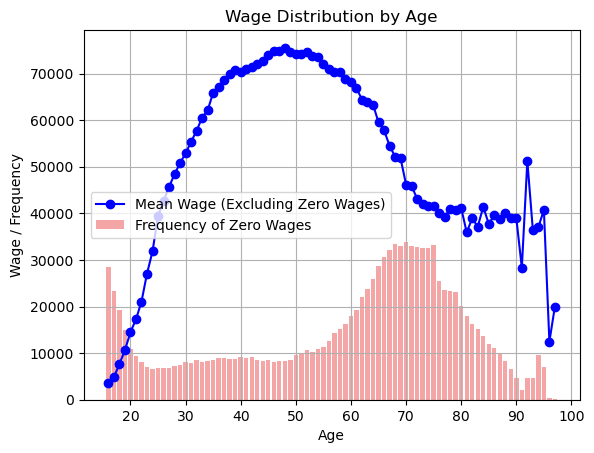

In [20]:
wage_zero_data = wage_data[wage_data['INCWAGE'] == 0].groupby('AGE')['INCWAGE'].count()

mean_wage_by_age = wage_data[wage_data['INCWAGE'] > 0].groupby('AGE')['INCWAGE'].mean()


plt.bar(wage_zero_data.index, wage_zero_data.values, color='lightcoral', alpha=0.7, label='Frequency of Zero Wages')

plt.plot(mean_wage_by_age.index, mean_wage_by_age.values, color='blue', marker='o', label='Mean Wage (Excluding Zero Wages)')

plt.title('Wage Distribution by Age')
plt.xlabel('Age')
plt.ylabel('Wage / Frequency')
plt.legend()
plt.grid(True)
plt.show()

### Education data Grouping

C:\Users\Michael\AppData\Local\Temp\ipykernel_16108\1202596907.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wage_data['EDUC'] = wage_data['EDUC'].astype(str)
C:\Users\Michael\AppData\Local\Temp\ipykernel_16108\1202596907.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wage_data['EDUC_GROUPED'] = wage_data['EDUC'].replace({


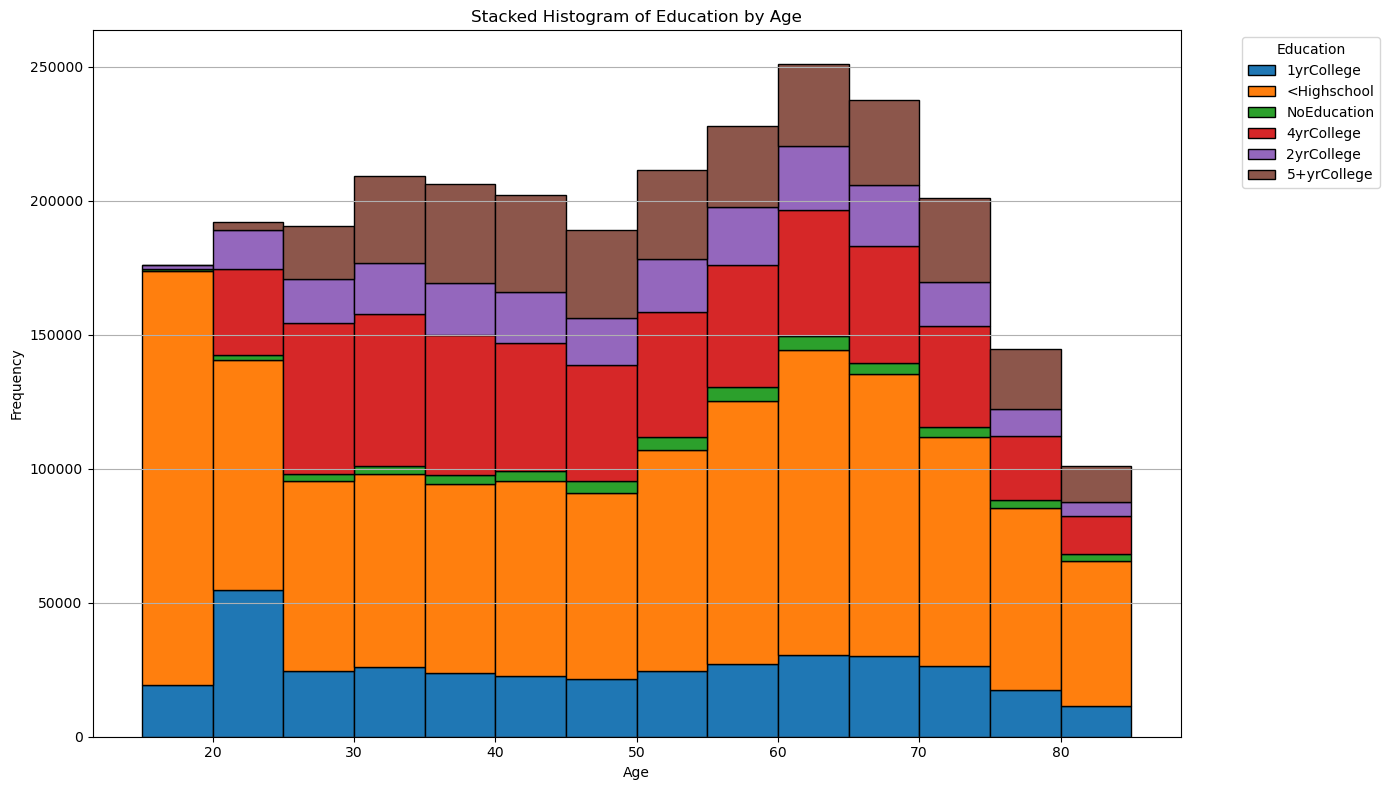

In [44]:
# group highschool and under in one
wage_data['EDUC'] = wage_data['EDUC'].astype(str)

wage_data['EDUC_GROUPED'] = wage_data['EDUC'].replace({
    '0': 'NoEducation','1': '<Highschool', '2': '<Highschool', '3': '<Highschool',
      '4': '<Highschool', '5': '<Highschool', '6': '<Highschool',
      '7': '1yrCollege', '8': '2yrCollege', '9': '3yrCollege',
      '10': '4yrCollege', '11': '5+yrCollege'
})
# 07	1 year of college	X
# 08	2 years of college	X
# 09	3 years of college	·
# 10	4 years of college	X
# 11	5+ years of college	X

plt.figure(figsize=(14, 8))

# Get the unique degree fields
edu = wage_data['EDUC_GROUPED'].unique()

# Plot stacked histogram
plt.hist([wage_data[wage_data['EDUC_GROUPED'] == field]['AGE'] for field in edu],
         bins=range(15, 90, 5), stacked=True, label=edu, edgecolor='black')

# Add titles and labels
plt.title('Stacked Histogram of Education by Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(title='Education', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')

# Display the plot
plt.tight_layout()
plt.show()

In [45]:
wage_data["EDUC_GROUPED"].unique()

array(['1yrCollege', '<Highschool', 'NoEducation', '4yrCollege',
       '2yrCollege', '5+yrCollege'], dtype=object)

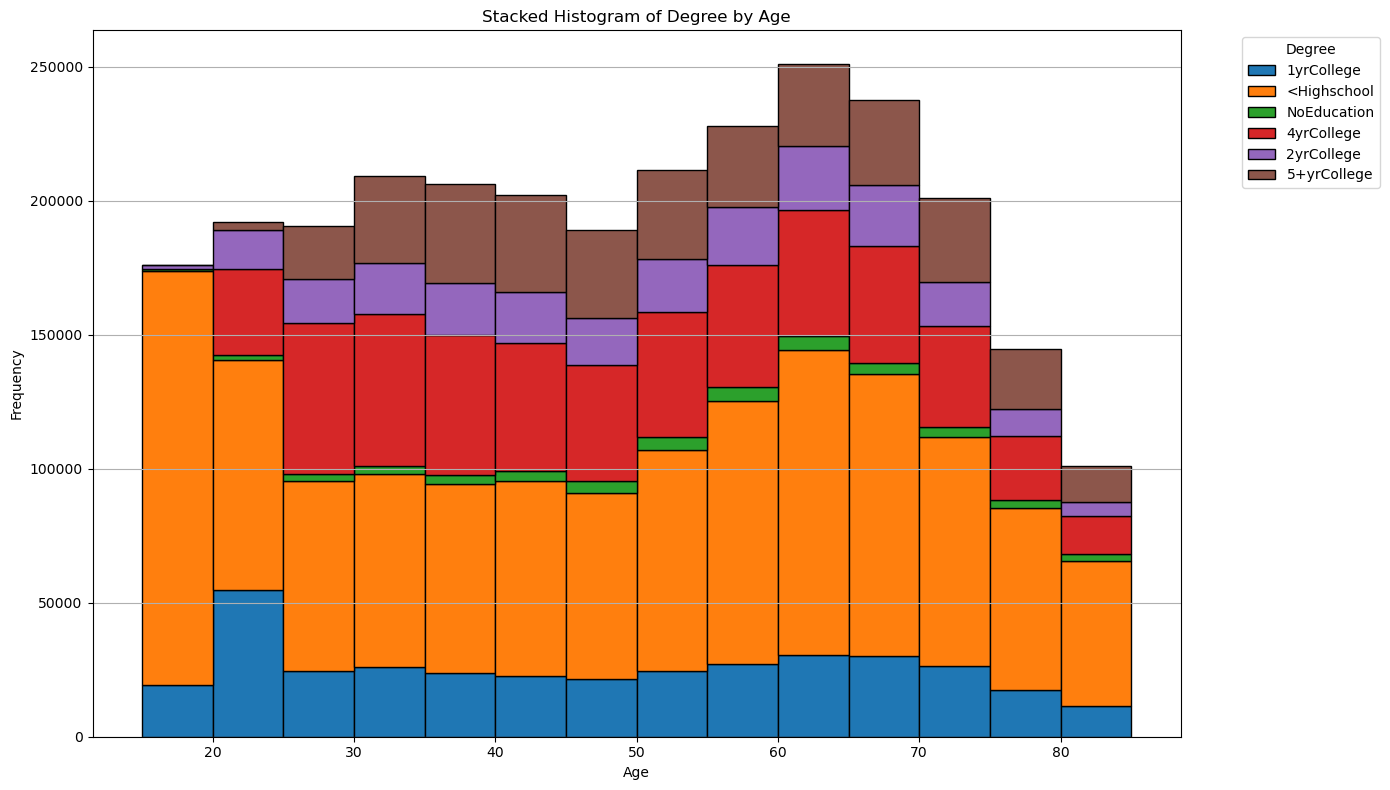

In [27]:

data = wage_data[wage_data['EDUC_GROUPED'] != '99']

# Step 2: Define a mapping for 'degcode' labels
data['EDUC_GROUPED'] = data['EDUC_GROUPED'].astype(str)
data['AGE'] = data['AGE'].astype(int)

# Step 3: Plot a stacked histogram of 'DEGFIELD' frequencies by 'AGE'
plt.figure(figsize=(14, 8))

# Get the unique degree fields
degree_fields = data['EDUC_GROUPED'].unique()

# Plot stacked histogram
plt.hist([data[data['EDUC_GROUPED'] == field]['AGE'] for field in degree_fields],
         bins=range(15, 90, 5), stacked=True, label=degree_fields, edgecolor='black')

# Add titles and labels
plt.title('Stacked Histogram of Degree by Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(title='Degree', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')

# Display the plot
plt.tight_layout()
plt.show()

In [28]:
group_mapping = {
    0: [0, 40],  # General and Undefined
    1: [11, 13, 21, 24, 25, 36, 37, 50, 51],  # STEM
    2: [15, 33, 34, 48, 49, 54, 55, 60, 64],  # Humanities, Arts, and Social Sciences
    3: [19, 20, 32, 62],  # Business, Law, and Communication
    4: [22, 23, 35, 41, 56, 57, 58, 59, 61, 38, 53],  # Vocational, Health, and Education
}

# Create a reverse mapping for quick lookup
group_reverse_mapping = {field: group for group, fields in group_mapping.items() for field in fields}

# Map the DEGFIELD column to its corresponding group
wage_data['DEGGROUP'] = wage_data['DEGFIELD'].map(group_reverse_mapping)
wage_data.drop(columns=['DEGFIELD'])


C:\Users\Michael\AppData\Local\Temp\ipykernel_16108\3160579650.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wage_data['DEGGROUP'] = wage_data['DEGFIELD'].map(group_reverse_mapping)


,REGION,SEX,AGE,MARST,RACE,HCOVANY,EDUC,EMPSTAT,INCWAGE,INCWELFR,INCINVST,TRANTIME,EDUC_GROUPED,DEGGROUP
0,32,2,85,5,8,2,7,3,0,0,0,0,1yrCollege,0.0
1,32,1,51,5,1,2,6,3,12500,0,0,0,<Highschool,0.0
2,32,2,36,6,2,2,2,3,16400,0,0,0,<Highschool,0.0
3,32,1,74,6,2,2,0,3,0,0,0,0,NoEducation,0.0
4,32,1,49,4,1,1,7,3,0,0,0,0,1yrCollege,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3373372,41,1,55,6,1,2,6,1,21800,0,0,13,<Highschool,0.0
3373373,41,1,33,6,1,2,10,1,52000,0,0,10,4yrCollege,1.0
3373374,41,2,27,6,1,2,10,1,43000,0,0,45,4yrCollege,4.0
3373376,41,1,66,1,1,2,6,1,162000,0,0,10,<Highschool,0.0


In [39]:
continuous_vars = ['AGE', 'TRANTIME']
categorical_vars = ['SEX', 'RACE', 'HCOVANY', 'EDUC', 'DEGGROUP', 'EMPSTAT', 
                    'INCWELFR', 'INCINVST']

## Train test split
We proceed to split the training set 

In [42]:
data = pd.get_dummies(wage_data, columns=categorical_vars, drop_first=True)



In [36]:

X = data.drop(columns=['INCWAGE'])
y = data['INCWAGE']

X = sm.add_constant(X)
# train text split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
model = sm.OLS(y_train, X_train)
results = model.fit()
y_pred = model.predict(X_test)

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data). The types seen wereNone and const           float64
REGION            int64
SEX               int64
AGE               int32
MARST             int64
RACE              int64
HCOVANY           int64
EDUC             object
DEGFIELD          int64
EMPSTAT           int64
INCWELFR          int64
INCINVST          int64
TRANTIME          int64
EDUC_GROUPED     object
dtype: object. The data was
1607142    158000
1545916    100000
2680931         0
3211799      4100
1826052     24900
            ...  
2025909         0
2818218      1500
2666960         0
3323397    150000
2654898         0
Name: INCWAGE, Length: 2247512, dtype: int64
and
          const  REGION  SEX  AGE  MARST  RACE  HCOVANY EDUC  DEGFIELD  \
1607142    1.0      21    1   66      1     1        2    8         0   
1545916    1.0      21    2   44      4     1        2   11        11   
2680931    1.0      31    2   32      6     1        1   11        62   
3211799    1.0      42    2   23      6     9        2    7         0   
1826052    1.0      41    1   64      5     3        2    8         0   
...        ...     ...  ...  ...    ...   ...      ...  ...       ...   
2025909    1.0      12    1   66      1     1        2    6         0   
2818218    1.0      33    1   17      6     1        2    3         0   
2666960    1.0      31    2   71      1     1        2    8         0   
3323397    1.0      21    1   46      1     1        2   10        56   
2654898    1.0      31    2   64      4     1        2    6         0   

         EMPSTAT  INCWELFR  INCINVST  TRANTIME EDUC_GROUPED  
1607142        1         0         0        15   2yrCollege  
1545916        1         0         0        20  5+yrCollege  
2680931        3         0         0         0  5+yrCollege  
3211799        3         0         0         0   1yrCollege  
1826052        1         0         0        15   2yrCollege  
...          ...       ...       ...       ...          ...  
2025909        3         0         0         0  <Highschool  
2818218        3         0         0         0  <Highschool  
2666960        3         0         0         0   2yrCollege  
3323397        1         0         0        15   4yrCollege  
2654898        3         0         0         0  <Highschool  

[2247512 rows x 14 columns]
before. After,
[158000 100000      0 ...      0 150000      0]
[[1.0 21 1 ... 0 15 '2yrCollege']
 [1.0 21 2 ... 0 20 '5+yrCollege']
 [1.0 31 2 ... 0 0 '5+yrCollege']
 ...
 [1.0 31 2 ... 0 0 '2yrCollege']
 [1.0 21 1 ... 0 15 '4yrCollege']
 [1.0 31 2 ... 0 0 '<Highschool']].